/Users/thompsong/Dropbox/DATA/SEISAN_DB/WAV/PNTBO/1991/12/1991-12-02-1526-46M.PNTBO_007
6 Trace(s) in Stream:
.CABZ.._ | 1991-12-02T15:26:46.400000Z - 1991-12-02T15:28:02.575680Z | 100.8 Hz, 7680 samples
.QADZ.._ | 1991-12-02T15:26:46.400000Z - 1991-12-02T15:28:02.575680Z | 100.8 Hz, 7680 samples
.PI2Z.._ | 1991-12-02T15:26:46.400000Z - 1991-12-02T15:28:02.575680Z | 100.8 Hz, 7680 samples
.CRWZ.._ | 1991-12-02T15:26:46.400000Z - 1991-12-02T15:28:02.575680Z | 100.8 Hz, 7680 samples
.FNGZ.._ | 1991-12-02T15:26:46.400000Z - 1991-12-02T15:28:02.575680Z | 100.8 Hz, 7680 samples
.CABN.._ | 1991-12-02T15:26:46.400000Z - 1991-12-02T15:28:02.575680Z | 100.8 Hz, 7680 samples
.CABZ.._ -> XB.CAB..EHZ
.QADZ.._ -> XB.QAD..EHZ
.PI2Z.._ -> XB.PI2..EHZ
.CRWZ.._ -> XB.CRW..EHZ
.FNGZ.._ -> XB.FNG..EHZ
.CABN.._ -> XB.CAB..EHN
6 Trace(s) in Stream:
XB.CAB..EHZ | 1991-12-02T15:26:46.400000Z - 1991-12-02T15:28:03.190000Z | 100.0 Hz, 7680 samples
XB.QAD..EHZ | 1991-12-02T15:26:46.400000Z - 1991-12-02T15:28:03

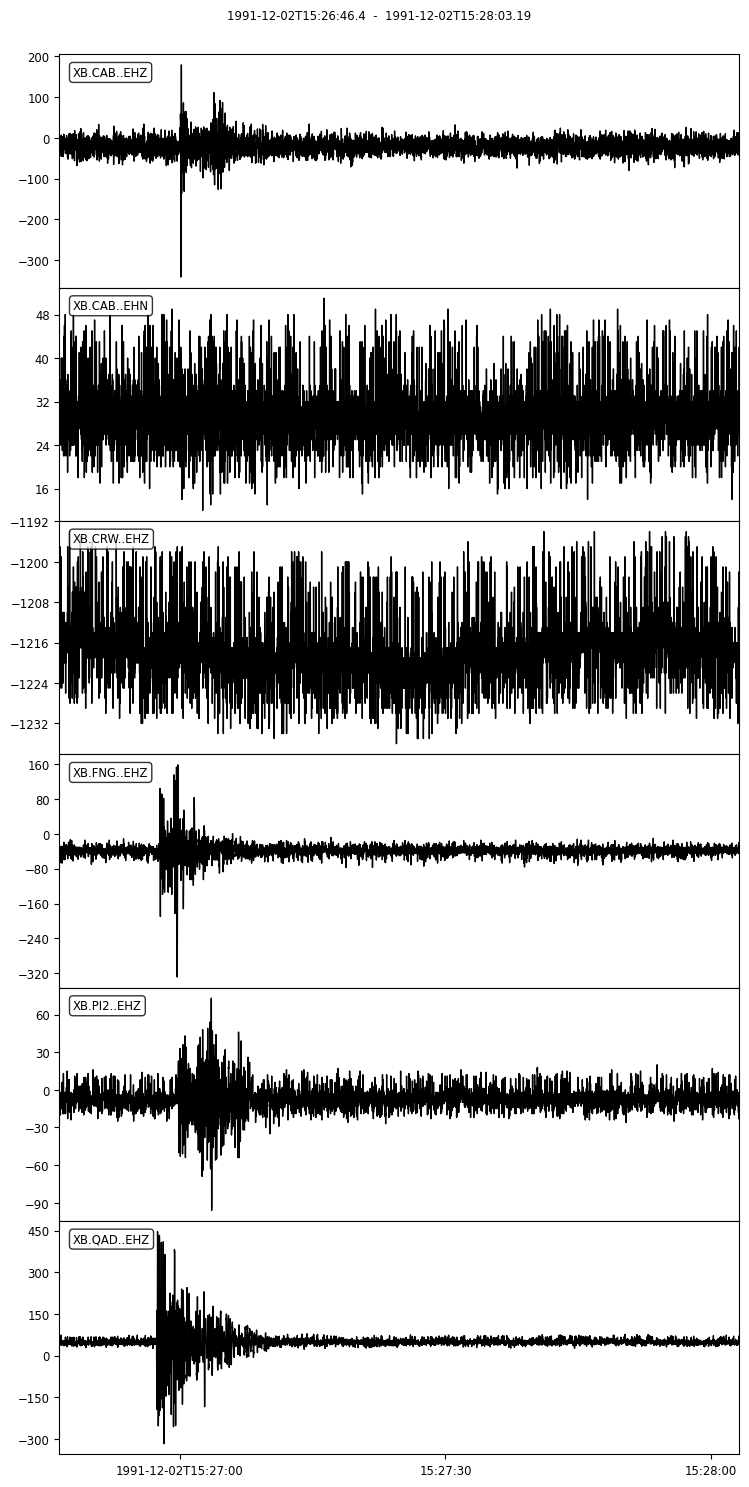

In [ ]:
import os
import glob
import obspy
dbname = 'PNTBO'
dbpath = os.path.join( os.getenv('HOME'), 'Dropbox', 'DATA', 'SEISAN_DB', 'WAV', dbname)
if not os.path.isdir(dbpath):
    print('%s does not exist. Bye!' % dbpath)
YYYY = '1991'
MM = '12'
yyyymmdir = os.path.join(dbpath, YYYY, MM)
mseedfiles = glob.glob(os.path.join(yyyymmdir, '%s-%s*M.PNTBO_*' % (YYYY, MM) ))
for mseedfile in mseedfiles:
    print(mseedfile)
    st = obspy.read(mseedfile)
    print(st)
    for tr in st:
        old_id = tr.id
        tr.stats.sampling_rate=100.0 # otherwise coming in as 100.8 Hz
        tr.stats.network = 'XB' # assigned by Gale Cox on April 7, 2023
        tr.stats.channel = 'EH%s' % tr.stats.station[-1] 
            # E for short period sensor at 100 Hz
            # H for high gain 
            # Z, N, or E channel component was part of station name
        tr.stats.station = tr.stats.station[:-1] # cut off channel component from name
        print(old_id, '->', tr.id)
    print(st)
    st.plot(equal_scale=False)
    choice = input('ENTER for next event, q to quit')
    if choice=='q':
        break
    